In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from math import ceil

In [4]:
train_data = pd.read_csv(r'../../datasets/train_data.csv')
validation_data = pd.read_csv(r'../../datasets/validation_data.csv')
test_data = pd.read_csv(r'../../datasets/test_data.csv')

In [5]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5


In [6]:
category_codes = np.unique(train_data['CategoryCode'].values)
dict_categories = {}

for i in range(len(category_codes)):
    dict_categories[category_codes[i]] = i

In [7]:
item_codes = np.unique(train_data['ItemCode'].values)
dict_item_codes = {}

for i in range(len(item_codes)):
    dict_item_codes[item_codes[i]] = i

In [8]:
def string_to_date(d):
    return datetime(int(d.split('/')[2]), int(d.split('/')[0]), int(d.split('/')[1]))

In [9]:
WEEKS_PER_YEAR = 52
CATEGORY_CODES_COUNT = len(category_codes)
ITEM_CODES_COUNT = len(item_codes)

MAX_SALES = 434

In [10]:
train_data.describe()

,ItemCode,DailySales
count,1.992100e+04,19921.000000
mean,6.110610e+05,7.351890
std,4.549868e+05,14.605342
min,3.418000e+03,1.000000
25%,1.176100e+05,2.000000
50%,8.379430e+05,3.000000
75%,1.058713e+06,7.000000
max,1.105027e+06,434.000000


In [11]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

def get_annual_week_id(date):
    week_id = pd.Period(date).week
    return (WEEKS_PER_YEAR - week_id)/WEEKS_PER_YEAR

def get_monthly_week_id(date):
    first_day = date.replace(day=1)

    dom = date.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

def get_category_id(id):
    return (dict_categories[id] - CATEGORY_CODES_COUNT)/CATEGORY_CODES_COUNT

def get_item_code_id(id):
    return (ITEM_CODES_COUNT - dict_item_codes[id])/ITEM_CODES_COUNT
    

In [12]:
train_data['WeekID'] = train_data['DateID'].apply(get_annual_week_id)
train_data['DateID'] = train_data['DateID'].apply(string_to_date)

In [13]:
train_data['DailySales'] = train_data['DailySales']
train_data['Year'] = train_data['DateID'].apply(get_year)
# train_data['WeekIDofMonth'] = train_data['DateID'].apply(get_monthly_week_id)
train_data['ItemCode'] = train_data['ItemCode'].apply(get_item_code_id)
train_data['CategoryCode'] = train_data['CategoryCode'].apply(get_category_id)

In [14]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales,WeekID,Year
0,-0.75,0.762887,2021-11-06,7,0.153846,2021
1,-0.25,0.536082,2021-11-18,16,0.115385,2021
2,-1.00,0.613402,2022-01-24,6,0.923077,2022
3,-0.75,0.680412,2021-10-30,5,0.173077,2021
4,-0.75,0.438144,2021-10-30,5,0.173077,2021


In [15]:
train_data.shape

(19921, 6)

In [16]:
# group_by_week = train_data.groupby(['WeekID', 'CategoryCode', 'ItemCode', 'MonthID', 'Year', 'WeekIDofMonth'])['DailySales'].sum().reset_index()
group_by_week = train_data.groupby(['WeekID', 'CategoryCode', 'ItemCode', 'Year'])['DailySales'].sum().reset_index()

In [17]:
group_by_week = group_by_week.rename(columns = {'DailySales': 'WeeklySales'}, inplace = False)

In [18]:
group_by_week.head()

,WeekID,CategoryCode,ItemCode,Year,WeeklySales
0,0.0,-1.0,0.072165,2021,8
1,0.0,-1.0,0.077320,2021,5
2,0.0,-1.0,0.077320,2022,1
3,0.0,-1.0,0.103093,2021,2
4,0.0,-1.0,0.103093,2022,7


In [19]:
group_by_week.describe()

,WeekID,CategoryCode,ItemCode,Year,WeeklySales
count,3952.000000,3952.000000,3952.000000,3952.000000,3952.000000
mean,0.347716,-0.770053,0.507012,2021.329200,37.058957
std,0.375209,0.217393,0.286906,0.469982,72.419014
min,0.000000,-1.000000,0.005155,2021.000000,1.000000
25%,0.076923,-1.000000,0.262887,2021.000000,9.000000
50%,0.173077,-0.750000,0.505155,2021.000000,17.000000
75%,0.884615,-0.750000,0.753866,2022.000000,36.250000
max,0.980769,-0.250000,1.000000,2022.000000,909.000000


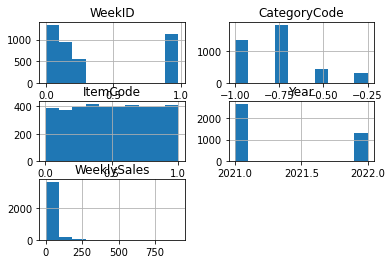

In [20]:
group_by_week.hist()
plt.show()

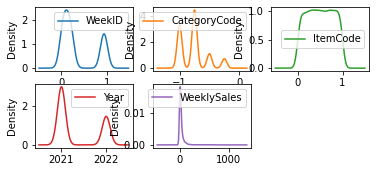

In [21]:
group_by_week.plot(kind='density', subplots=True, sharex=False, layout=(3, 3))
plt.show()

In [22]:
column_names = list(group_by_week.columns)
column_names

['WeekID', 'CategoryCode', 'ItemCode', 'Year', 'WeeklySales']

[Text(0.5, 1.0, 'Correlation matrix\n')]

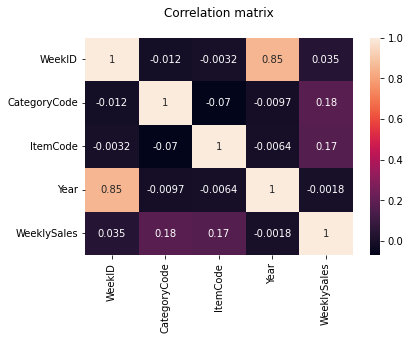

In [23]:
hm = sns.heatmap(group_by_week.corr(), annot = True)
hm.set(title = "Correlation matrix\n")

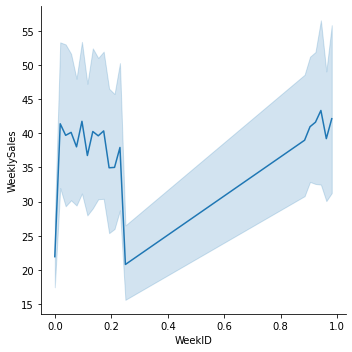

In [24]:
sns.relplot(x=group_by_week['WeekID'], y=group_by_week['WeeklySales'], kind='line')
plt.show()

In [25]:
X = pd.DataFrame()
X['week_id_of_year'] = group_by_week['WeekID']
# X['week_id_of_month'] = group_by_week['WeekIDofMonth']
X['category_code'] = group_by_week['CategoryCode']
X['item_code'] = group_by_week['ItemCode']
# X['month_id'] = group_by_week['MonthID']

Y = pd.DataFrame()
Y = group_by_week['WeeklySales'].apply(lambda y: (909 - y)/909)

In [26]:
X.head()

,week_id_of_year,category_code,item_code
0,0.0,-1.0,0.072165
1,0.0,-1.0,0.077320
2,0.0,-1.0,0.077320
3,0.0,-1.0,0.103093
4,0.0,-1.0,0.103093


In [27]:
X.dtypes

week_id_of_year    float64
category_code      float64
item_code          float64
dtype: object

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=True)

In [29]:
X_train.skew()

week_id_of_year    0.867626
category_code      0.846297
item_code         -0.011351
dtype: float64

## Validate

In [30]:
def week_to_weekid(week):
    if (week == "w1"):
        return get_annual_week_id(('02/14/2022'))
    if (week == "w2"):
        return get_annual_week_id(('02/21/2022'))
    if (week == "w3"):
        return get_annual_week_id(('02/28/2022'))
    if (week == "w4"):
        return get_annual_week_id(('03/07/2022'))

In [31]:
# category_codes_test = np.unique(validation_data['CategoryCode'].values)
# dict_categories_test = {}

# for i in range(len(category_codes_test)):
#     dict_categories_test[category_codes_test[i]] = i

In [32]:
# item_codes_test = np.unique(train_data['ItemCode'].values)
# dict_item_codes_test = {}

# for i in range(len(item_codes_test)):
#     dict_item_codes_test[item_codes_test[i]] = i

In [33]:
validation_data['ItemCode'] = validation_data['ItemCode'].apply(get_item_code_id)
validation_data['CategoryCode'] = validation_data['CategoryCode'].apply(get_category_id)

In [34]:
weeks = np.unique(test_data['Week'].values)
dict_week_to_weekid = {}

for i in range(len(weeks)):
    dict_week_to_weekid [weeks[i]] = week_to_weekid(weeks[i])

print(dict_week_to_weekid)

{'w1': 0.8653846153846154, 'w2': 0.8461538461538461, 'w3': 0.8269230769230769, 'w4': 0.8076923076923077}


In [35]:
validation_data.head()

,CategoryCode,ItemCode,Week,WeeklySales
0,-0.75,0.350515,w1,11
1,-0.75,0.015464,w1,11
2,-0.75,0.469072,w4,5
3,-1.00,0.314433,w4,30
4,-1.00,0.974227,w2,60


In [36]:
validation_data["WeekID"] = validation_data["Week"].apply(week_to_weekid)

In [37]:
validation_data.head()

,CategoryCode,ItemCode,Week,WeeklySales,WeekID
0,-0.75,0.350515,w1,11,0.865385
1,-0.75,0.015464,w1,11,0.865385
2,-0.75,0.469072,w4,5,0.807692
3,-1.00,0.314433,w4,30,0.807692
4,-1.00,0.974227,w2,60,0.846154


In [38]:
val_data_grp_by_week = validation_data.groupby(['CategoryCode', 'ItemCode', 'WeekID'])['WeeklySales'].sum().reset_index()

In [39]:
val_data_grp_by_week.head()

,CategoryCode,ItemCode,WeekID,WeeklySales
0,-1.0,0.072165,0.807692,14
1,-1.0,0.072165,0.826923,14
2,-1.0,0.072165,0.846154,11
3,-1.0,0.072165,0.865385,19
4,-1.0,0.077320,0.807692,29


In [40]:
X_valid = pd.DataFrame()
X_valid['week_id_of_year'] = val_data_grp_by_week['WeekID']
X_valid['category_code'] = val_data_grp_by_week['CategoryCode']
X_valid['item_code'] = val_data_grp_by_week['ItemCode']

Y_valid = pd.DataFrame()
Y_valid = val_data_grp_by_week['WeeklySales'].apply(lambda y: (909 - y)/909)

# Random Forest Refgressor

In [41]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor().fit(X_train, Y_train)

reg.score(X_test, Y_test)

0.8294454186247555

In [42]:
reg_valid = RandomForestRegressor().fit(X, Y)
reg_valid.score(X_valid, Y_valid)

0.7131704832648147

In [43]:
predicted = reg.predict(X_test)

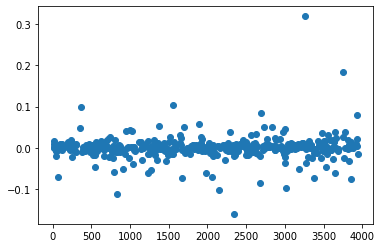

In [44]:
plt.plot(Y_test - predicted, marker='o', linestyle='')

In [45]:
predicted_valid = reg_valid.predict(X_valid)

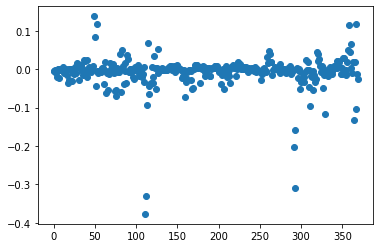

In [46]:
plt.plot(Y_valid - predicted_valid, marker='o', linestyle='')

# Extra Trees Regressor

In [47]:
from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor().fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.7679031625123668

In [48]:
reg.score(X_valid, Y_valid)

0.5658082715862023

In [49]:
predicted = reg.predict(X_test)

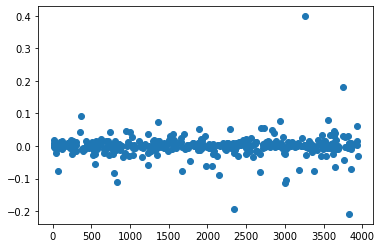

In [50]:
plt.plot(Y_test - predicted, marker='o', linestyle='')

In [51]:
predicted_valid = reg_valid.predict(X_valid)

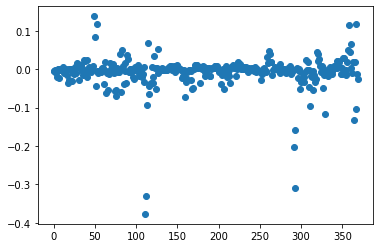

In [52]:
plt.plot(Y_valid - predicted_valid, marker='o', linestyle='')

# Voting Regressor

In [53]:
from sklearn.ensemble import VotingRegressor

r1 = RandomForestRegressor()
r2 = ExtraTreesRegressor()

# reg = VotingRegressor([('rf', r1), ('et', r2)]).fit(X_test, Y_test)
reg = VotingRegressor([('rf', r1), ('et', r2)]).fit(X_train, Y_train)
reg.score(X_test, Y_test)

0.798999832792448

In [54]:
reg.score(X_valid, Y_valid)

0.6545526094156114

In [55]:
predicted = reg.predict(X_test)

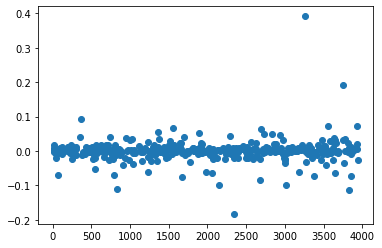

In [56]:
plt.plot(Y_test - predicted, marker='o', linestyle='')

In [57]:
predicted_valid = reg_valid.predict(X_valid)

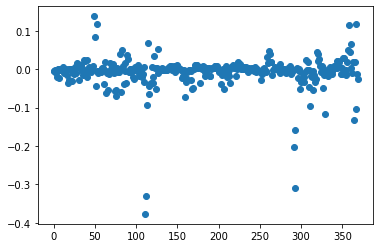

In [58]:
plt.plot(Y_valid - predicted_valid, marker='o', linestyle='')

# 